In [1]:
import py3dep
import geopandas as gpd
import rasterio as rio

In [2]:
rainier_box = gpd.read_file("../shapefiles/mt_rainier.geojson")
print(rainier_box.crs)
rainier_box = rainier_box['geometry'][0]

epsg:4326


In [3]:
dem = py3dep.get_map("DEM", rainier_box, resolution=10, geo_crs="epsg:4326", crs="epsg:3857")
dem.name = "dem"
dem.attrs["units"] = "meters"
dem = dem.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.cubic) # ok for DEM
dem.rio.to_raster("dem_rainier_py3dep.tif")
print(dem.rio.bounds())

(585783.4105996646, 5182800.711888489, 603559.0032291838, 5200426.425996681)


In [4]:
aspect = py3dep.get_map("Aspect Degrees", rainier_box, resolution=10, geo_crs="epsg:4326", crs="epsg:3857")
aspect.name = "aspect"
aspect.attrs["units"] = "degrees"
print("Aspect min-max before reprojecting:", float(aspect.min()), float(aspect.max()))
aspect = aspect.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.nearest) # don't use cubic for degrees, just take nearest neighbor
aspect.rio.to_raster("aspect_rainier_py3dep.tif")
print(aspect.rio.bounds())
print("Aspect min-max after reprojecting:", float(aspect.min()), float(aspect.max()))

Aspect min-max before reprojecting: 0.0 359.0
(585783.4105996646, 5182800.711888489, 603559.0032291838, 5200426.425996681)
Aspect min-max after reprojecting: 0.0 32767.0


In [5]:
slope = py3dep.get_map("Slope Degrees", rainier_box, resolution=10, geo_crs="epsg:4326", crs="epsg:3857")
slope.name = "slope"
slope.attrs["units"] = "degrees"
print("Slope min-max before reprojecting:", float(slope.min()), float(slope.max()))
slope = slope.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.nearest) # don't use cubic for degrees, just take nearest neighbor
slope.rio.to_raster("slope_rainier_py3dep.tif")
print(slope.rio.bounds())
print("Slope min-max after reprojecting:", float(slope.min()), float(slope.max()))

Slope min-max before reprojecting: 0.0 84.0
(585783.4105996646, 5182800.711888489, 603559.0032291838, 5200426.425996681)
Slope min-max after reprojecting: 0.0 255.0


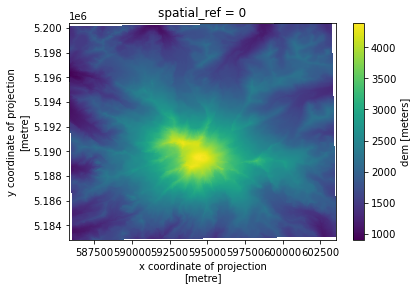

In [6]:
dem.plot()

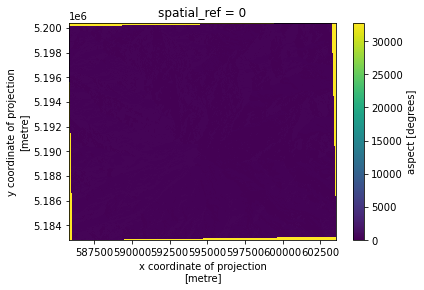

In [7]:
aspect.plot()

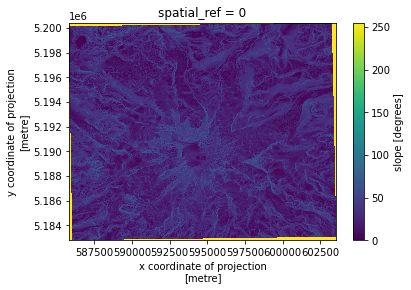

In [8]:
slope.plot()